In [8]:
import cv2
import pandas as pd
import numpy as np
import os
from pathlib import Path

def parse_bounding_boxes_to_df(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    bboxes = []
    for line in lines:
        parts = line.strip().split(',')
        class_id = int(parts[0])
        bbox = list(map(float, parts[1:5]))
        conf = float(parts[-1])
        bboxes.append([class_id, *bbox, conf])
    return pd.DataFrame(bboxes, columns=['class', 'x_center', 'y_center', 'width', 'height', 'confidence'])

def convert_bbox_format_df(df, img_width, img_height):
    # Ensure the bounding box coordinates are converted correctly
    df['x1'] = ((df['x_center'] - df['width'] / 2) * img_width).round().astype(int).clip(0, img_width - 1)
    df['y1'] = ((df['y_center'] - df['height'] / 2) * img_height).round().astype(int).clip(0, img_height - 1)
    df['x2'] = ((df['x_center'] + df['width'] / 2) * img_width).round().astype(int).clip(0, img_width - 1)
    df['y2'] = ((df['y_center'] + df['height'] / 2) * img_height).round().astype(int).clip(0, img_height - 1)
    return df

def draw_bounding_boxes(image_path, df, output_path):
    image = cv2.imread(image_path)
    for _, row in df.iterrows():
        x1, y1, x2, y2 = int(row['x1']), int(row['y1']), int(row['x2']), int(row['y2'])
        class_id = int(row['class'])
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, f'{class_id}: {row["confidence"]:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2.imwrite(output_path, image)

images_folder = Path('C:/Users/letri/Documents/cuong/IR_RGB_Detect/RGB_IR_dataset/test/images/Vis')
labels_folder = Path('C:/Users/letri/Documents/cuong/IR_RGB_Detect/runs/test/exp8/labels')
output_folder = Path('C:/Users/letri/Documents/cuong/detect/mid_fusion')
output_folder.mkdir(exist_ok=True)

# Process each image
for image_file in images_folder.glob('*.png'):
    image_path = str(image_file)
    label_file_path = labels_folder / f'{image_file.stem}.txt'
    output_image_path = output_folder / image_file.name

    if label_file_path.exists():
        bbox_df = parse_bounding_boxes_to_df(str(label_file_path))
        image = cv2.imread(image_path)
        
        if image is not None:
            img_height, img_width = image.shape[:2]
            bbox_df = convert_bbox_format_df(bbox_df, img_width, img_height)
            draw_bounding_boxes(image_path, bbox_df, str(output_image_path))
            print(f"Processed {output_image_path}")
        else:
            print(f"Could not read image {image_path}")
    else:
        print(f"Label file does not exist for {image_path}")


Processed C:\Users\letri\Documents\cuong\detect\mid_fusion\03855.png
Processed C:\Users\letri\Documents\cuong\detect\mid_fusion\03856.png
Processed C:\Users\letri\Documents\cuong\detect\mid_fusion\03857.png
Processed C:\Users\letri\Documents\cuong\detect\mid_fusion\03858.png
Processed C:\Users\letri\Documents\cuong\detect\mid_fusion\03859.png
Processed C:\Users\letri\Documents\cuong\detect\mid_fusion\03860.png
Processed C:\Users\letri\Documents\cuong\detect\mid_fusion\03861.png
Processed C:\Users\letri\Documents\cuong\detect\mid_fusion\03862.png
Processed C:\Users\letri\Documents\cuong\detect\mid_fusion\03863.png
Processed C:\Users\letri\Documents\cuong\detect\mid_fusion\03864.png
Processed C:\Users\letri\Documents\cuong\detect\mid_fusion\03865.png
Processed C:\Users\letri\Documents\cuong\detect\mid_fusion\03866.png
Processed C:\Users\letri\Documents\cuong\detect\mid_fusion\03867.png
Processed C:\Users\letri\Documents\cuong\detect\mid_fusion\03868.png
Processed C:\Users\letri\Documents

In [3]:
import cv2
import pandas as pd
import numpy as np
import os
from pathlib import Path

def parse_bounding_boxes_to_df(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    bboxes = []
    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        bbox = list(map(float, parts[1:5]))
        conf = float(parts[-1])
        bboxes.append([class_id, *bbox, conf])
    return pd.DataFrame(bboxes, columns=['class', 'x_center', 'y_center', 'width', 'height', 'confidence'])

def convert_bbox_format_df(df, img_width = 728 , img_height = 1024):
    df['x1'] = ((df['x_center'] - df['width'] / 2) * img_width).astype(int)
    df['y1'] = ((df['y_center'] - df['height'] / 2) * img_height).astype(int)
    df['x2'] = ((df['x_center'] + df['width'] / 2) * img_width).astype(int)
    df['y2'] = ((df['y_center'] + df['height'] / 2) * img_height).astype(int)
    return df

def draw_bounding_boxes(image_path, df, output_path):
    image = cv2.imread(image_path)
    for _, row in df.iterrows():
        x1, y1, x2, y2 = int(row['x1']), int(row['y1']), int(row['x2']), int(row['y2'])
        class_id = int(row['class'])
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, f'{class_id}: {row["confidence"]:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2.imwrite(output_path, image)

images_folder = Path('C:/Users/letri/Documents/project/data/Vis/images/test')
labels_folder = Path('C:/Users/letri/Documents/cuong/IR_RGB_Detect/runs/test/exp7/labels')
output_folder = Path('C:/Users/letri/Documents/project/detect/mid_fusion_cuong')
output_folder.mkdir(exist_ok=True)

# Process each image
for image_file in images_folder.glob('*.png'):
    image_path = str(image_file)
    label_file_path = labels_folder / f'{image_file.stem}.txt'
    output_image_path = output_folder / image_file.name

    if label_file_path.exists():
        bbox_df = parse_bounding_boxes_to_df(str(label_file_path))
        image = cv2.imread(image_path)
        if image is not None:
            bbox_df = convert_bbox_format_df(bbox_df, img_width, img_height)
            draw_bounding_boxes(image_path, bbox_df, str(output_image_path))
            print(f"Processed {output_image_path}")
        else:
            print(f"Could not read image {image_path}")
    else:
        print(f"Label file does not exist for {image_path}")


ValueError: invalid literal for int() with base 10: '0,405.6,289.8,77.6,230.2,0.85791'

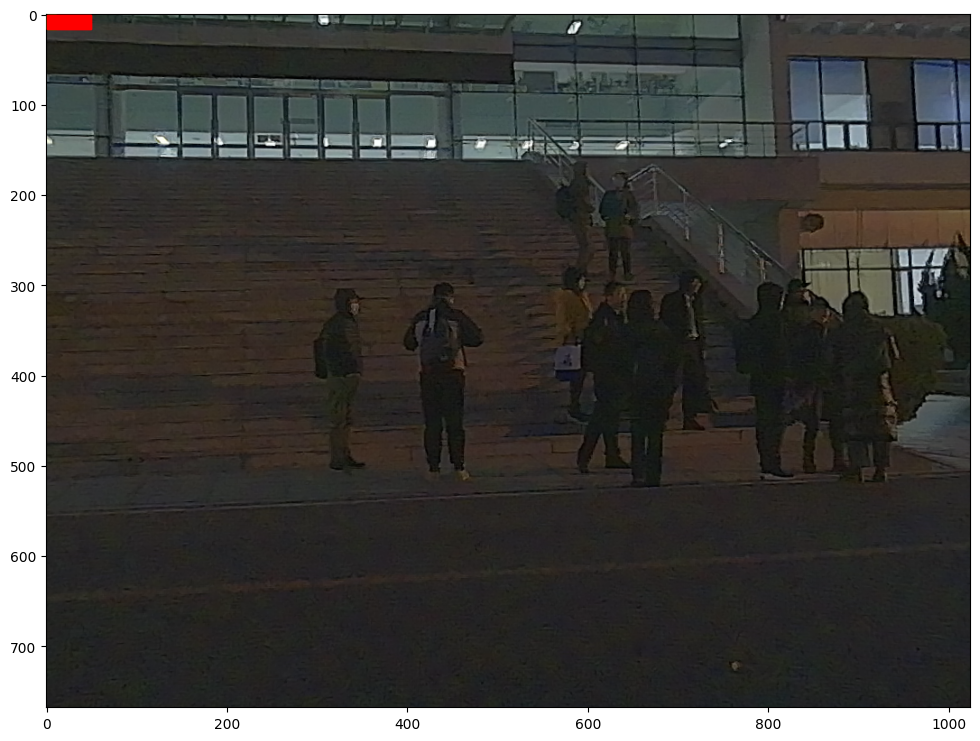

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

def plot_bounding_boxes(image_path, ground_truth_boxes, prediction_boxes):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(1, figsize=(12, 9))

    # Plot ground truth boxes
    for box in ground_truth_boxes:
        class_id, x_center, y_center, width, height = box
        x = x_center - width / 2
        y = y_center - height / 2
        rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='g', facecolor='none')
        ax.add_patch(rect)
        plt.text(x, y, f'{class_id}', color='green', verticalalignment='top', bbox={'color': 'green', 'pad': 0})

    # Plot prediction boxes
    for box in prediction_boxes:
        class_id, x_center, y_center, width, height, confidence = box
        x = x_center - width / 2
        y = y_center - height / 2
        rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.text(x, y, f'{class_id} {confidence:.2f}', color='red', verticalalignment='top', bbox={'color': 'red', 'pad': 0})

    ax.imshow(image)
    plt.show()

# Example usage
ground_truth_boxes = [
    [0, 0.3173828125, 0.5247395833333333, 0.0703125, 0.2734375],
    [0, 0.423828125, 0.5299479166666666, 0.091796875, 0.296875]
]

prediction_boxes = [
    [0, 0.340922, 0.425105, 0.0715285, 0.238054, 0.946185],
    [0, 0.549911, 0.390199, 0.0490202, 0.191684, 0.928271]
]

plot_bounding_boxes('C:/Users/letri/Documents/project/data/Vis/images/test/03855.png', ground_truth_boxes, prediction_boxes)
